# Data Review and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data.csv', sep = ',')
data.head()

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
0,Banking,Female,Small,17,11,2,Medium,High,13,No
1,Banking,Male,Small,18,12,4,High,Low,9,No
2,Banking,Male,Small,17,12,4,High,Medium,22,No
3,Banking,Male,Small,24,13,1,High,Medium,3,Yes
4,Banking,Male,Small,32,14,3,High,Medium,4,Yes


In [3]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'

    return(HTML(s+css))

## Data review and EDA

In [4]:
View(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sector               60 non-null     object
 1   CEO_Gender           60 non-null     object
 2   Size                 60 non-null     object
 3   Security_Invest      60 non-null     int64 
 4   Security_Breach_Att  60 non-null     int64 
 5   Succ_Sec_Breaches    60 non-null     int64 
 6   Sec_Rating           60 non-null     object
 7   CEO_Sec_Exp          60 non-null     object
 8   LOT_in_Business      60 non-null     int64 
 9   Stock_Market         60 non-null     object
dtypes: int64(4), object(6)
memory usage: 4.8+ KB


### Conclusion:

**There is no missing values.**

In [6]:
data.describe()

,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,LOT_in_Business
count,60.000000,60.000000,60.000000,60.000000
mean,63.516667,54.116667,22.633333,8.600000
std,69.317616,64.302804,23.436150,6.211526
min,12.000000,7.000000,0.000000,1.000000
25%,21.000000,14.000000,3.000000,3.750000
50%,32.000000,35.500000,18.500000,7.500000
75%,88.750000,65.500000,32.250000,13.250000
max,435.000000,321.000000,100.000000,22.000000


In [7]:
data.describe(include = [object])

,Sector,CEO_Gender,Size,Sec_Rating,CEO_Sec_Exp,Stock_Market
count,60,60,60,60,60,60
unique,3,2,3,3,3,2
top,Banking,Male,Medium,Medium,Low,Yes
freq,20,44,23,22,21,42


### Target feature for Linear Regression is Number of Successful Security Breach Attemps,
therefore it is worth to see the linear dedpendencies between numerical features and the target

In [8]:
types = data.dtypes
numerical_features = list(types[(types != 'object')].index)

print(numerical_features)

['Security_Invest', 'Security_Breach_Att', 'Succ_Sec_Breaches', 'LOT_in_Business']


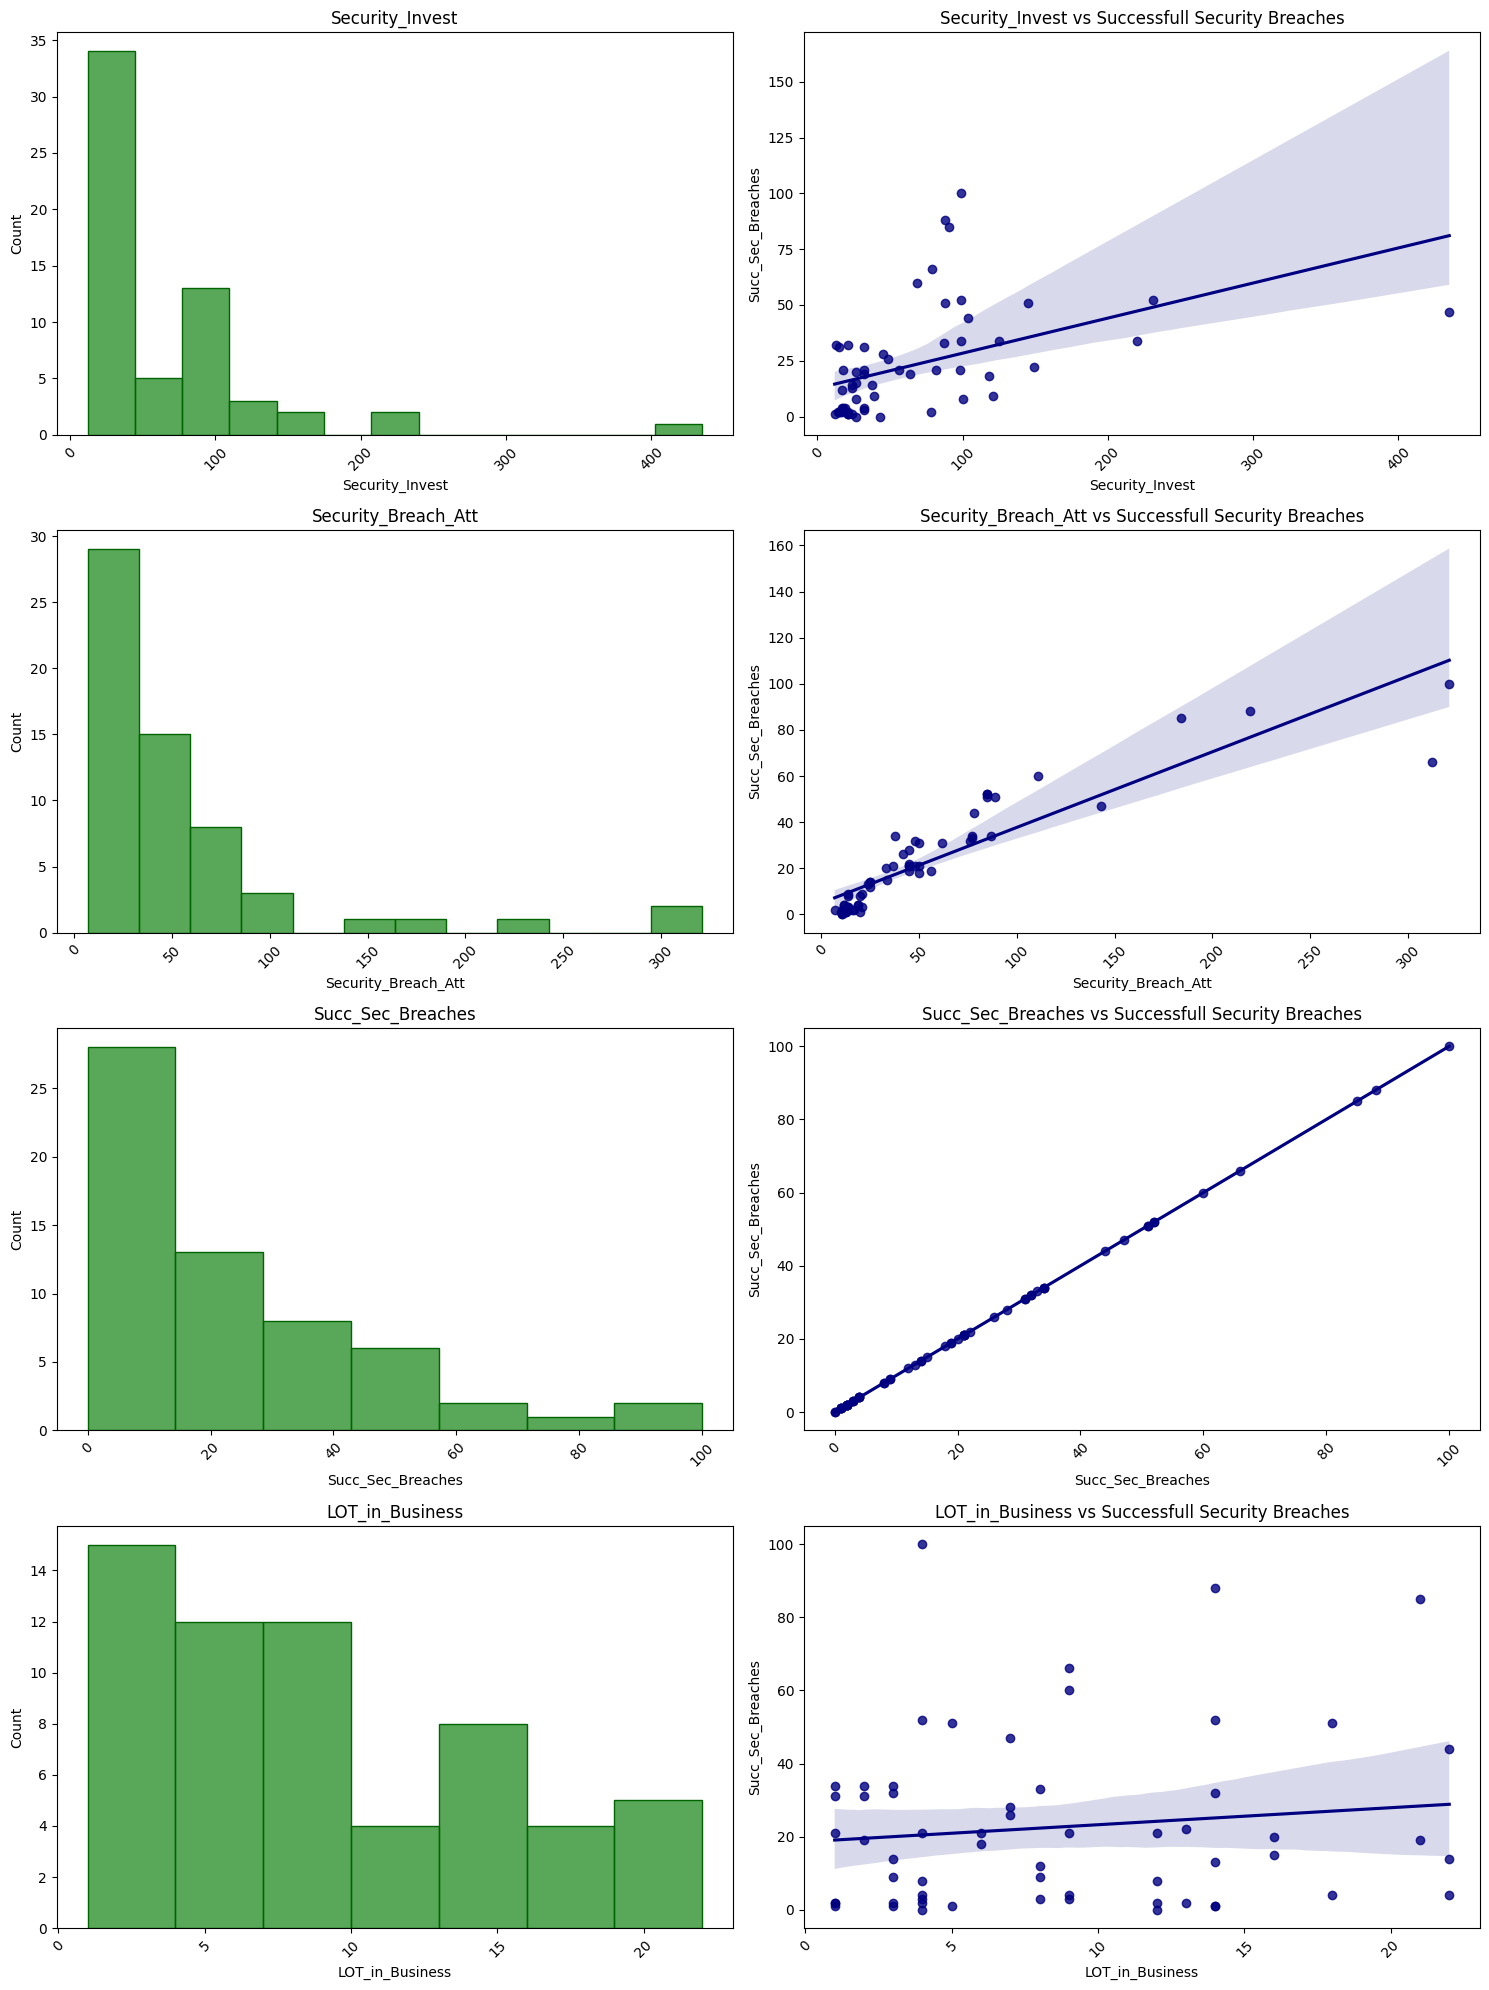

In [9]:
n = len(numerical_features)

fig, axes = plt.subplots(n, 2, figsize = (15, 20))

for i, feature in enumerate(numerical_features):
    
    histplot = sns.histplot(data = data, x = feature, color = 'forestgreen', edgecolor='darkgreen', ax = axes[i][0])
    histplot.set_title('{}'.format(feature))
    histplot.xaxis.set_tick_params(rotation = 45)
    
    regplot = sns.regplot(data = data, x = feature, y = 'Succ_Sec_Breaches', color = 'navy', ax = axes[i][1])
    regplot.set_title('{} vs Successfull Security Breaches'.format(feature))
    regplot.xaxis.set_tick_params(rotation = 45);

plt.tight_layout()

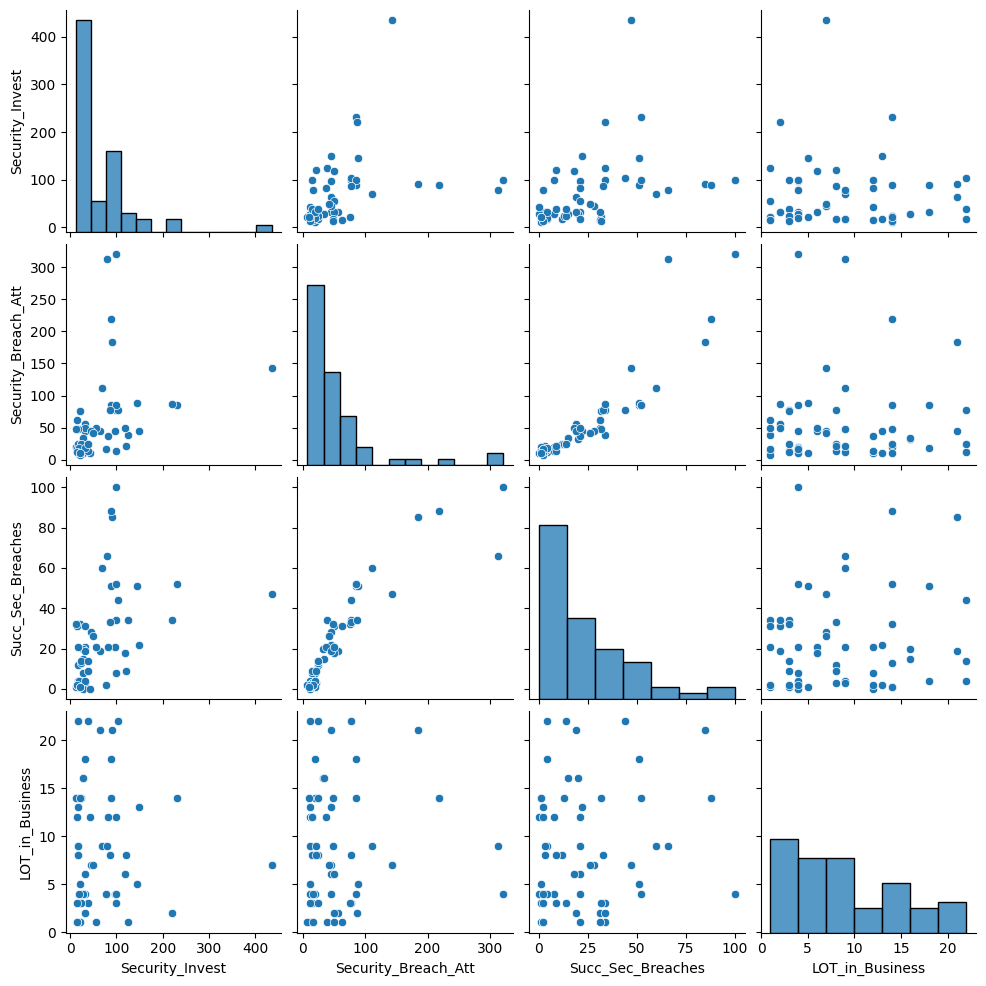

In [10]:
sns.pairplot(data[numerical_features]);

### Conclusion:

Security Breach Attempts feature has a strong positive correlation, direct and linear relationship. Value of the security investments vs Successful Security Breach Attemps have some upward trend, but highly variable. Length of years in business has no visible trend in correlation with Number of Security Breach Attamps and therefore might not be useful linearly.

## Review Various Dependencies

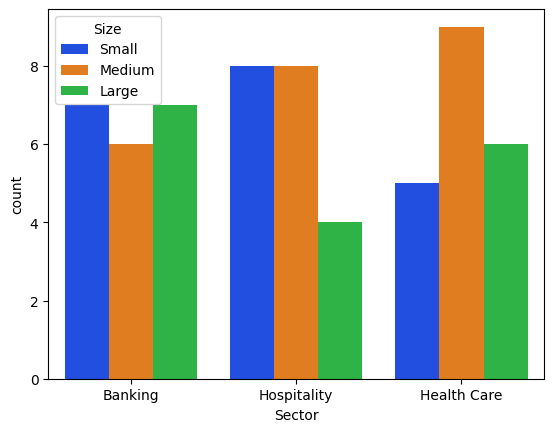

In [11]:
# How many companies of different size in each sector

sns.set_palette('bright')
sns.countplot(data = data, x = 'Sector', hue = 'Size')
plt.show();

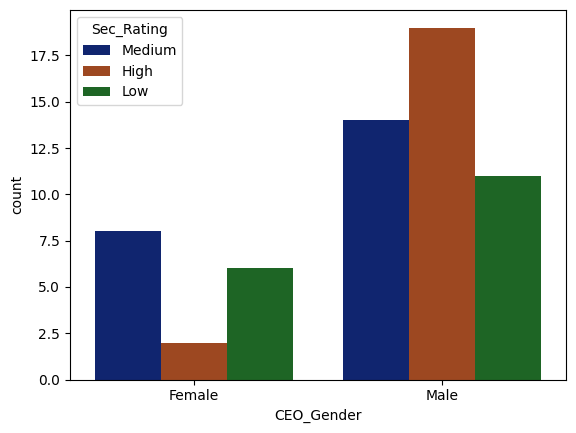

In [12]:
# Influence CEO gender on security rating of the company

sns.set_palette('dark')
sns.countplot(data = data, x = 'CEO_Gender', hue = 'Sec_Rating')
plt.show();

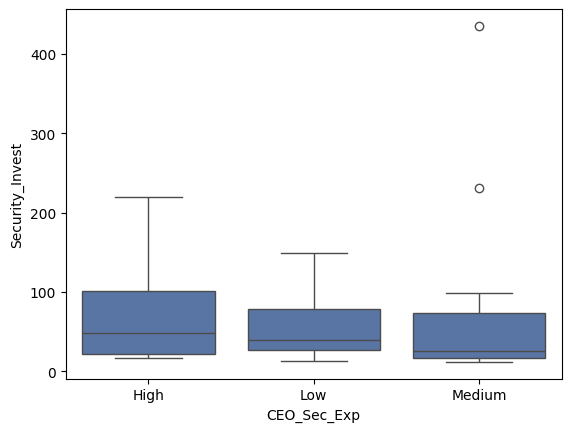

In [13]:
# Dependence of CEO security experience vs amount of Security investments

sns.set_palette('deep')
sns.boxplot(data = data, x = 'CEO_Sec_Exp', y = 'Security_Invest')
plt.show();

#### Review dependencies between Successful Security Breach Attempts and Business Security Risk Rating

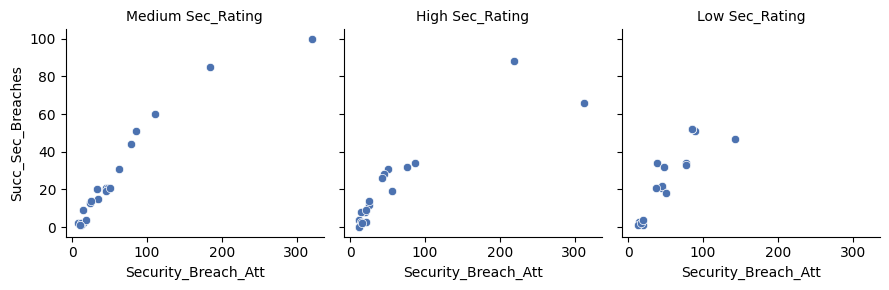

In [14]:
g = sns.FacetGrid(data, col = 'Sec_Rating')
g.map_dataframe(sns.scatterplot, x = 'Security_Breach_Att', y = 'Succ_Sec_Breaches')
g.set_titles(col_template = '{col_name} Sec_Rating')
plt.show();

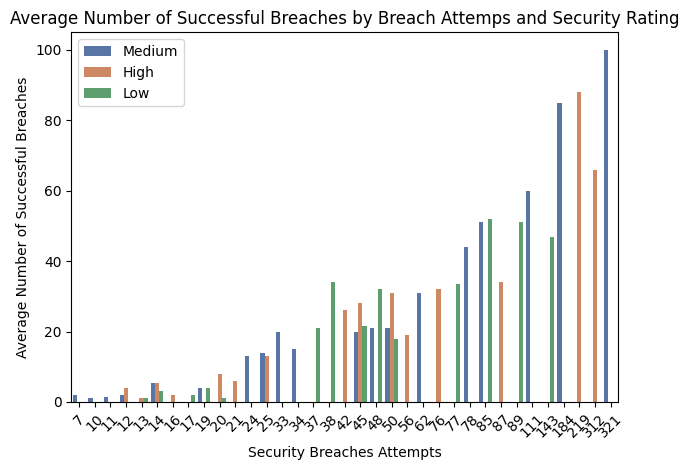

In [15]:
rating = data.groupby(['Security_Breach_Att', 'Sec_Rating'])['Succ_Sec_Breaches'].mean().reset_index()

sns.barplot(data = rating,
           x = 'Security_Breach_Att',
           y = 'Succ_Sec_Breaches',
           hue = 'Sec_Rating')
plt.title('Average Number of Successful Breaches by Breach Attemps and Security Rating')
plt.xlabel('Security Breaches Attempts')
plt.ylabel('Average Number of Successful Breaches')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show();

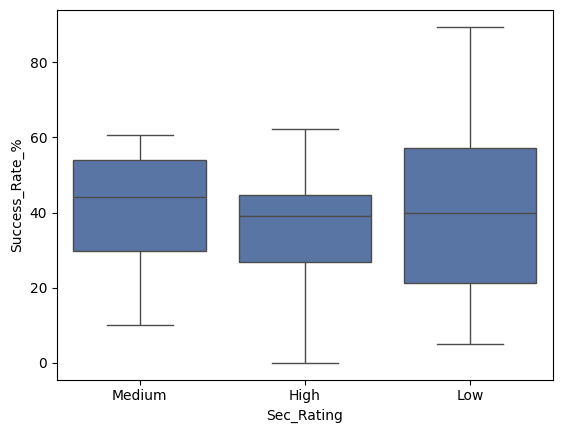

In [16]:
rating['Success_Rate_%'] = round((rating['Succ_Sec_Breaches']) / (rating['Security_Breach_Att']) * 100, 2)

sns.set_palette('deep')
sns.boxplot(data = rating, x = 'Sec_Rating', y = 'Success_Rate_%')
plt.show();

### Conclusion:

There is no visibale trend

## Review the presence outliers

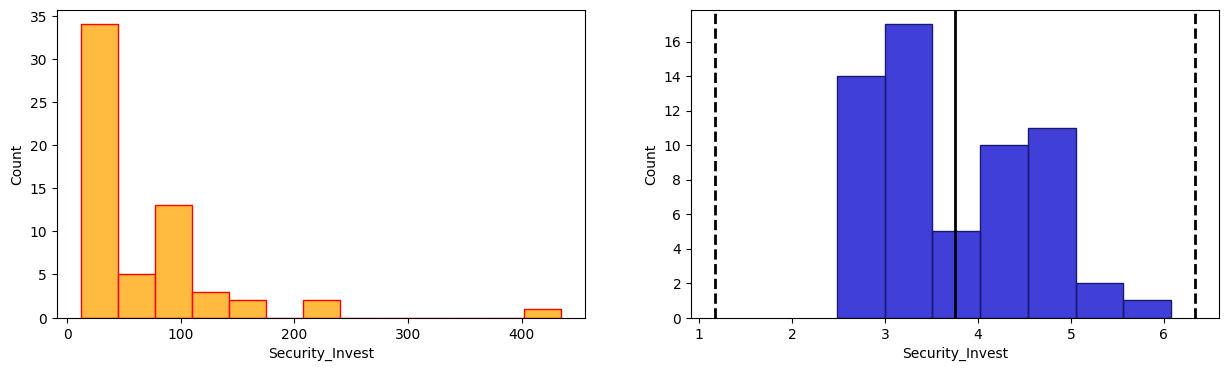

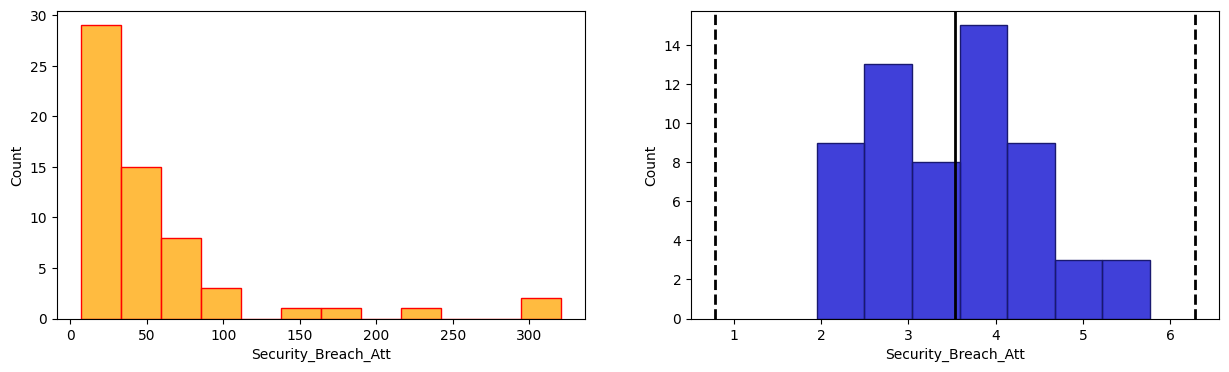

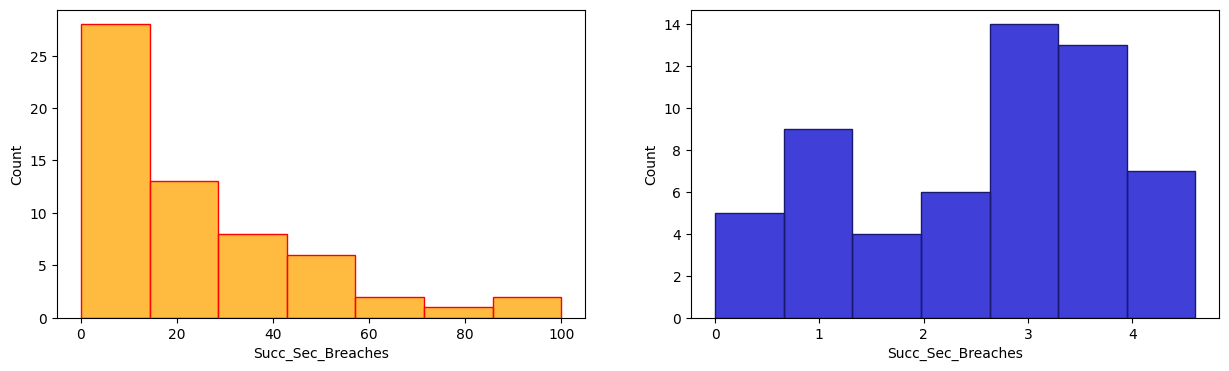

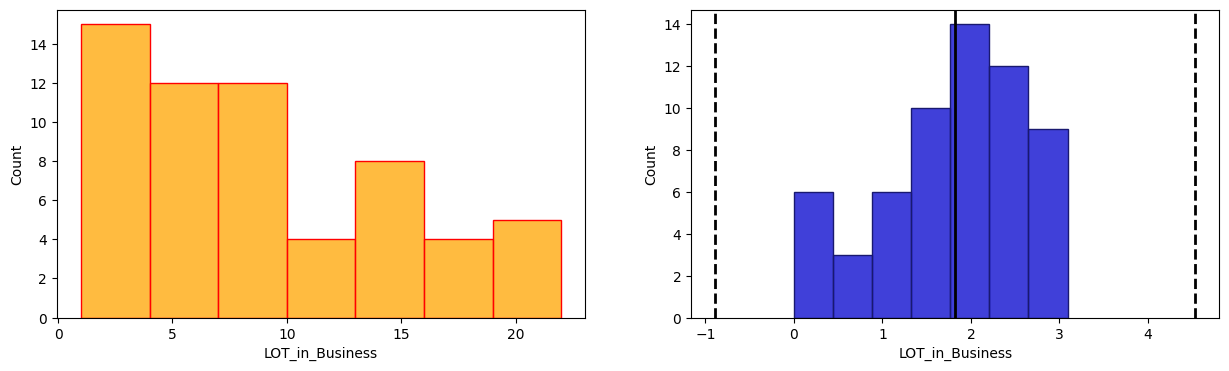

In [17]:
# FEATURE: Value of security investments in the last year (thousands in USD)

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = data, x = 'Security_Invest', color = 'orange', edgecolor='red', ax = axes[0]);

log_sec_inv = np.log(data['Security_Invest'])

sns.histplot(data = log_sec_inv, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_sec_inv.mean(), color = 'k', lw = 2)
axes[1].axvline(log_sec_inv.mean()+ 3 *log_sec_inv.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_sec_inv.mean()- 3 *log_sec_inv.std(),
                color='k', ls='--', lw=2);


# FEATURE: Security Breach Attemps in past year

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = data, x = 'Security_Breach_Att', color = 'orange', edgecolor='red', ax = axes[0]);

log_sec_br = np.log(data['Security_Breach_Att'])

sns.histplot(data = log_sec_br, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_sec_br.mean(), color = 'k', lw = 2)
axes[1].axvline(log_sec_br.mean()+ 3 *log_sec_br.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_sec_br.mean()- 3 *log_sec_br.std(),
                color='k', ls='--', lw=2);


# FEATURE: Successful Security Breach Attempts in past year

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = data, x = 'Succ_Sec_Breaches', color = 'orange', edgecolor='red', ax = axes[0]);

log_succ_br = np.log(data['Succ_Sec_Breaches'])

sns.histplot(data = log_succ_br, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_succ_br.mean(), color = 'k', lw = 2)
axes[1].axvline(log_succ_br.mean()+ 3 *log_succ_br.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_succ_br.mean()- 3 *log_succ_br.std(),
                color='k', ls='--', lw=2);


# FEATURE: Length of Time in Business (in years)

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = data, x = 'LOT_in_Business', color = 'orange', edgecolor='red', ax = axes[0]);

log_lot = np.log(data['LOT_in_Business'])

sns.histplot(data = log_lot, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_lot.mean(), color = 'k', lw = 2)
axes[1].axvline(log_lot.mean()+ 3 *log_lot.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_lot.mean()- 3 *log_lot.std(),
                color='k', ls='--', lw=2);

### Conclusion:

There are questionable values in Value of Security Investments feature and in Security Breach Attempts, but since the data is small, it is not worth to calculate the outliers. If data would be much bigger, it is recommended to see the results of calculating outliers using both z-score and Tukey methods. 

Even logarithmic converted data is not Gaussian distributed. The reason for it again size of the data.The bigger the data, the more "bell shaped" it will be.

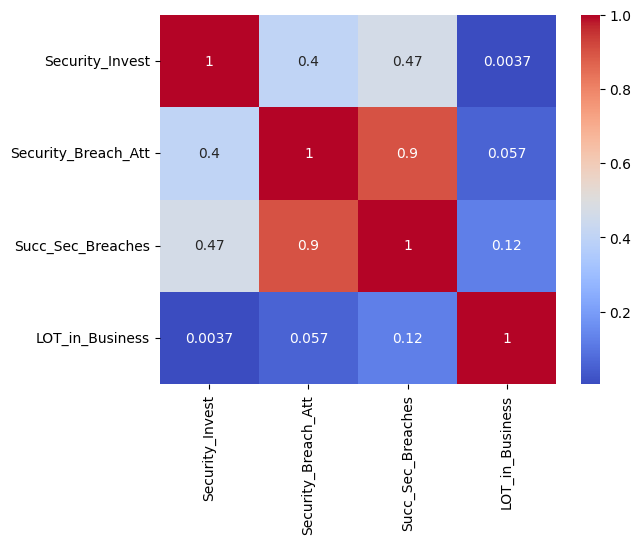

In [18]:
# Correlation

sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm');

### Conclusion:

There is no multicorrelation between the numeric features.

#### Linear Regression model is very sensitive to categorical features, hence all categorical features shall be encoded

In [19]:
ord_enc = preprocessing.OrdinalEncoder()
data[['Sector', 'Size', 'Stock_Market', 'CEO_Gender', 'Sec_Rating', 'CEO_Sec_Exp']] = ord_enc.fit_transform(
    data[['Sector', 'Size', 'Stock_Market', 'CEO_Gender', 'Sec_Rating', 'CEO_Sec_Exp']])
data.sample(10)

,Sector,CEO_Gender,Size,Security_Invest,Security_Breach_Att,Succ_Sec_Breaches,Sec_Rating,CEO_Sec_Exp,LOT_in_Business,Stock_Market
10,2.0,1.0,2.0,104,78,44,2.0,0.0,22,1.0
6,0.0,1.0,2.0,43,11,0,0.0,0.0,12,1.0
58,1.0,1.0,0.0,38,25,14,0.0,1.0,22,1.0
20,0.0,0.0,1.0,18,21,3,0.0,0.0,9,0.0
55,1.0,0.0,0.0,64,45,19,2.0,1.0,21,1.0
33,2.0,1.0,1.0,17,25,12,0.0,2.0,8,1.0
53,2.0,1.0,0.0,220,87,34,0.0,0.0,2,1.0
29,2.0,1.0,1.0,435,143,47,1.0,2.0,7,1.0
31,2.0,1.0,1.0,91,184,85,2.0,0.0,21,1.0
52,2.0,1.0,0.0,87,77,33,1.0,2.0,8,1.0


#### Selecting the most correlated (important) features vs the target

In [20]:
X = data.drop(['Succ_Sec_Breaches'], axis = 1)
y = data['Succ_Sec_Breaches']

print(X.shape)
print(y.shape)

(60, 9)
(60,)


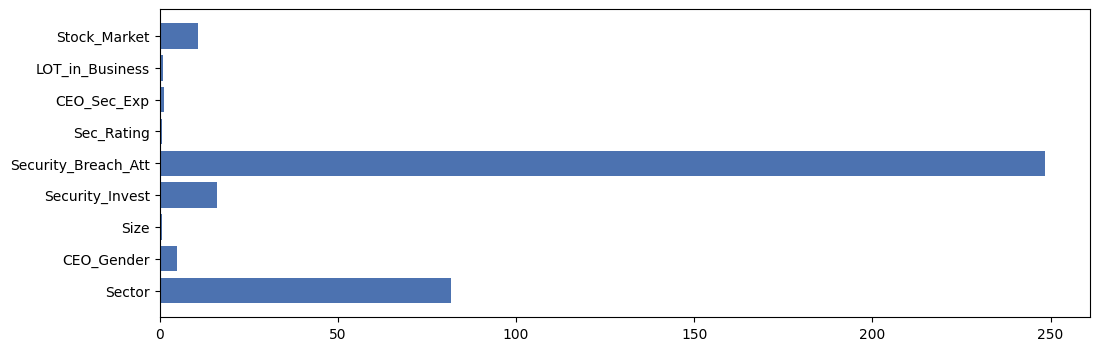

['Size', 'Sec_Rating']


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from itertools import compress

skb = SelectKBest(f_regression, k = 7).fit(X, y)
mask = skb.get_support()
name_col = X.columns.values

X_new = list(compress(name_col, mask))

result = list(set(X.columns) - set(X_new))
score_skb = skb.scores_

fig, ax = plt.subplots(figsize = (12, 4))
plt.barh(name_col, score_skb)
plt.show();

print(result)

### Conclusion

Security Rating and Size of the company - are the features that least influence (correlates) with the target value Number of Successful Breach Attemps.

Although initial run (baseline) of the Linear Regression Model will be done using all features.

In [22]:
# Function to calculate and display metrics

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))

In [23]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))
print('\n')
print('Train shape: {}'.format(y_train.shape))
print('Test shape: {}'.format(y_test.shape))

Train shape: (48, 9)
Test shape: (12, 9)


Train shape: (48,)
Test shape: (12,)


#### Review the target feature distribution

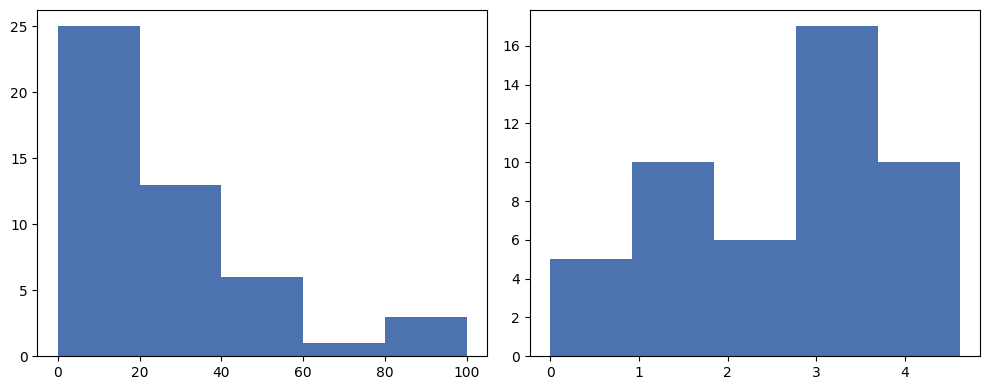

In [26]:
y_train_log = np.log1p(y_train) # logarith of the target feature - Number of Successful Breach Attempts

plt.figure(figsize = (10, 4))

plt.subplot(121)
plt.hist(y_train, bins = 5)

plt.subplot(122)
plt.hist(y_train_log, bins = 5)

plt.tight_layout()
plt.show();

# Linear Regression Model

### Baseline

In [28]:
# Linear Regression model with logarithmic target value

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)

y_train_predict = np.expm1(lr.predict(X_train))
y_test_predict = np.expm1(lr.predict(X_test))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.800
Train MAE: 6.444


Test R^2: -0.845
Test MAE: 15.945


In [29]:
# Linear Regression with normal target value

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.949
Train MAE: 4.388


Test R^2: 0.396
Test MAE: 9.308


### Normalization with RobustScaler and Polynomial Features

Train shape: (48, 54)
Test shape: (12, 54)


Train R^2: 1.000
Train MAE: 0.000


Test R^2: -3.667
Test MAE: 25.419


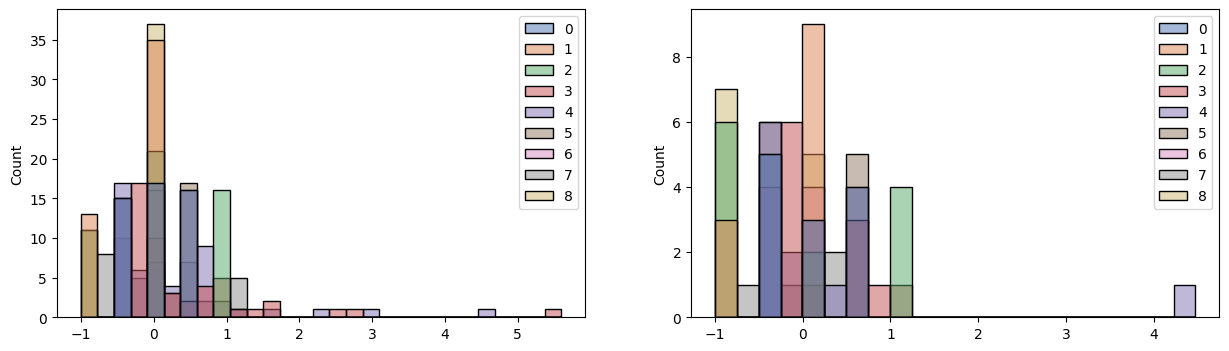

In [30]:
# Normalization

scaler = preprocessing.RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating polynomial Features

poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))
print('\n')

# Visualization

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_scaled, ax = axes[0]);
sns.histplot(data = X_test_scaled, ax = axes[1]);

# Linear Regression on normalized and polynomial features

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

### Lasso regularization on PowerTransformed and polynomial features

In [31]:
# Normalization

scaler = preprocessing.PowerTransformer(method = 'yeo-johnson')
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating polynomial Features

poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

# L1 (Lasso) Regularization

lasso_lr_poly = linear_model.Lasso()
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.947
Train MAE: 4.401


Test R^2: 0.848
Test MAE: 4.449


### Conclusion:

The results of the model has been improved, but it is worth to find the optimal $alpha$ parameter of Lasso Regularization and run Linear Regression on transformed and polynomial features

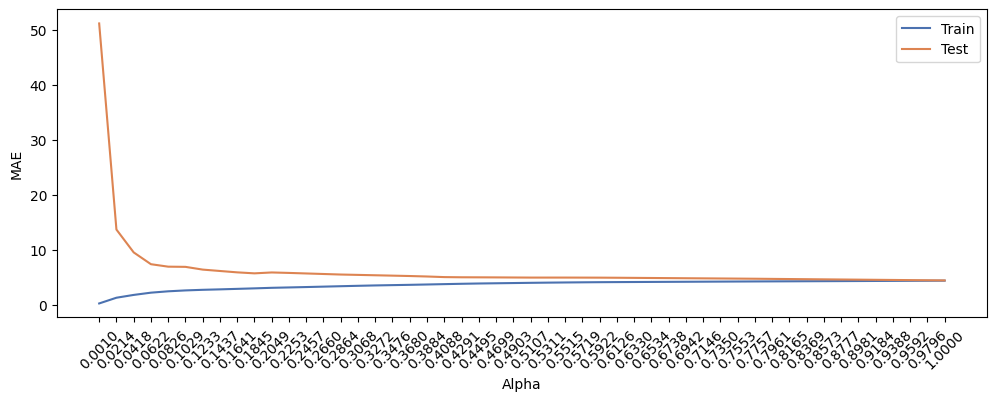

In [32]:
alpha_list = np.linspace(0.001, 1.0, 50)

train_scores = []
test_scores = []

for alpha in alpha_list:
    lasso_lr_poly = linear_model.Lasso(alpha = alpha, max_iter=10_000)
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    
    y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)
    y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)

    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict))

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(alpha_list, train_scores, label = 'Train')
ax.plot(alpha_list, test_scores, label = 'Test')

ax.set_xlabel('Alpha')
ax.set_ylabel('MAE')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation = 45)
ax.legend();

In [38]:
# alpha = 0.8777

lasso_lr_poly = linear_model.Lasso(alpha = 0.9592)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.948
Train MAE: 4.375


Test R^2: 0.846
Test MAE: 4.504


### Conclusion:

The model results has been improved

# Logistic Regression Model

#### Review the presence of classes balanced; Target Feature: Business Security Risk Rating

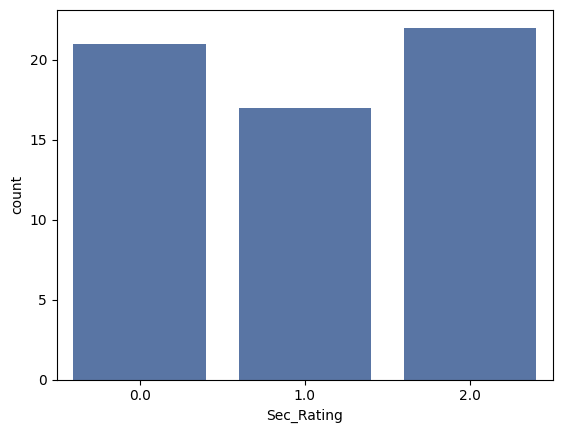

In [39]:
sns.countplot(data, x = 'Sec_Rating');

In [40]:
data['Sec_Rating'].value_counts(normalize = True)

Sec_Rating
2.0    0.366667
0.0    0.350000
1.0    0.283333
Name: proportion, dtype: float64

### Conclusion:

Both graph and calculation shows that our classes are more or less balanced, but it might be wise to use stratified parameter while spliting to train and test portions.

It is worth to check if there is relationship between Number of Successful Security Breach Attempts and Business Security Risk Rating in order to avoid leakage.

#### Review the relationship between Number of Successful Security Breach Attemps and Business Security Risk Rating

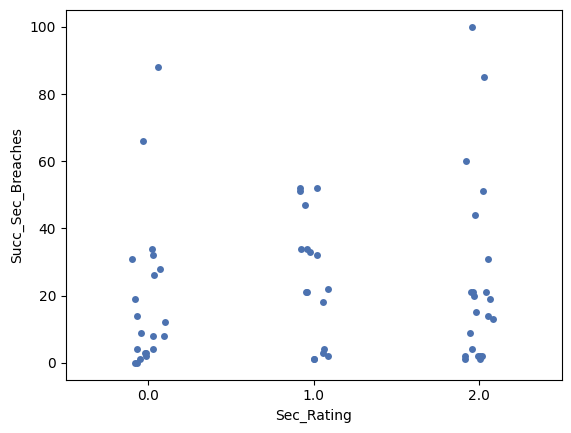

In [42]:
# Visualization

sns.stripplot(x = 'Sec_Rating', y = 'Succ_Sec_Breaches', data = data, jitter = True);

### Conclusion:

The plot shows wide overlap of successful breaches across all Security Rating levels. No clear increasing or decreasing pattern. Ratings have similar distributions of breaches, although there are a few high outliers. Visual evidence does not suggest a strong relationships. Hence it is worth to use statistical tests.

The statistical hypothesis are:

- Null Hypothesis ($H_0$):
> The distributions of Number of Successful Security Breach Attemps are the same accross all levels of Security Rating. There is no statistically significant difference in the number of successful security breaches between business with different security ratings.

- Alternative Hypothesis($H_1$):
> At least one level of Security Rating has statistically significantly different distribution of Successful Security Breach Attempts. In other words, the number of successful breaches varies depending on the security rating.

In [43]:
# Kruskal-Wallis statistical test

from scipy.stats import kruskal

groups = [group['Succ_Sec_Breaches'].values for name, group in data.groupby('Sec_Rating')]
stat, p = kruskal(*groups)

print(f'Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}')

Kruskal-Wallis statistic = 1.9268, p-value = 0.3816


In [44]:
# Spearman's Rank Correlation (ordinal vs numerical)

from scipy.stats import spearmanr

rho, pval = spearmanr(data['Sec_Rating'], data['Succ_Sec_Breaches'])
print(f"Spearman's rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman's rho = 0.0780, p-value = 0.5535


##### Kruskal-Wallis statistic shows that Number of Successful Security Breaches is not significantly different across security rating levels. There is no meaningful correlation between number of breaches and security rating. Therefore Number of Successful Security Breaches doesn't appear to cause leakage when predicting Security Rating. It is safe to include this feature in the Logistic Regression model predicting Security Rating.

In [45]:
# Function to calculate and display metrics

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    
    print('Accuracy on Train {:.2}'.format(metrics.accuracy_score(y_train, y_train_predict)))
    print('Accuracy on Test {:.2}'.format(metrics.accuracy_score(y_test, y_test_predict)))
    print('\n')
    print('Train {}'.format(metrics.classification_report(y_train, y_train_predict)))
    print('Test {}'.format(metrics.classification_report(y_test, y_test_predict)))

In [58]:
# Train Test Split

X = data.drop(['Sec_Rating'], axis = 1)
y = data['Sec_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (48, 9)
Test shape: (12, 9)


### Baseline

In [59]:
# Normalization

scaler = preprocessing.PowerTransformer(method = 'yeo-johnson')
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model

log_reg_first = linear_model.LogisticRegression(random_state = 42, 
                                                max_iter = 1_000)
log_reg_first.fit(X_train_scaled, y_train)

y_train_predict = log_reg_first.predict(X_train_scaled)
y_test_predict = log_reg_first.predict(X_test_scaled)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Accuracy on Train 0.58
Accuracy on Test 0.33


Train               precision    recall  f1-score   support

         0.0       0.62      0.76      0.68        17
         1.0       0.55      0.43      0.48        14
         2.0       0.56      0.53      0.55        17

    accuracy                           0.58        48
   macro avg       0.58      0.57      0.57        48
weighted avg       0.58      0.58      0.58        48

Test               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.50      0.67      0.57         3
         2.0       0.50      0.40      0.44         5

    accuracy                           0.33        12
   macro avg       0.33      0.36      0.34        12
weighted avg       0.33      0.33      0.33        12



### Hyperparameters tuning

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty' : ['l2'],
    'solver' : ['lbfgs', 'newton-cg', 'sag'],
    'C' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
]

gscv_lg = GridSearchCV(estimator = linear_model.LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 1_000),
                                       param_grid = param_grid, n_jobs = -1, scoring = 'accuracy')

gscv_lg.fit(X_train_scaled, y_train)

y_train_predict = gscv_lg.predict(X_train_scaled)
y_test_predict = gscv_lg.predict(X_test_scaled)

print('Accuracy on train sample: {:.4f}'.format(metrics.accuracy_score(y_train, y_train_predict)))
print('Accuracy on test sample: {:.4f}'.format(metrics.accuracy_score(y_test, y_test_predict)))
print('\n')
print('The best parameters: {}'.format(gscv_lg.best_params_))
print('The best model parameters: {}'.format(gscv_lg.best_estimator_))

Accuracy on train sample: 0.6250
Accuracy on test sample: 0.3333


The best parameters: {'C': 0.4, 'penalty': 'l2', 'solver': 'lbfgs'}
The best model parameters: LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000,
                   random_state=42)


In [64]:
# Logistic Regression with best parameters

log_reg_second = linear_model.LogisticRegression(C = 0.04, penalty = 'l2', solver = 'lbfgs',
                                                 class_weight = 'balanced', random_state = 42, max_iter = 1_000)
log_reg_second.fit(X_train_scaled, y_train)

y_train_predict = log_reg_second.predict(X_train_scaled)
y_test_predict = log_reg_second.predict(X_test_scaled)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Accuracy on Train 0.48
Accuracy on Test 0.33


Train               precision    recall  f1-score   support

         0.0       0.58      0.65      0.61        17
         1.0       0.38      0.43      0.40        14
         2.0       0.46      0.35      0.40        17

    accuracy                           0.48        48
   macro avg       0.47      0.48      0.47        48
weighted avg       0.48      0.48      0.47        48

Test               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.50      0.67      0.57         3
         2.0       0.50      0.40      0.44         5

    accuracy                           0.33        12
   macro avg       0.33      0.36      0.34        12
weighted avg       0.33      0.33      0.33        12



In [67]:
classes = np.unique(y_train)
class_counts = np.bincount(y_train)
total_samples = len(y_train)

class_weights_manual = {
    cls: total_samples / (len(classes) * count)
    for cls, count in zip(classes, class_counts)
}

print("Classes:", classes)
print("Manual Class Weights:", class_weights_manual)

Classes: [0. 1. 2.]
Manual Class Weights: {np.float64(0.0): np.float64(0.9411764705882353), np.float64(1.0): np.float64(1.1428571428571428), np.float64(2.0): np.float64(0.9411764705882353)}


### ROC Curve

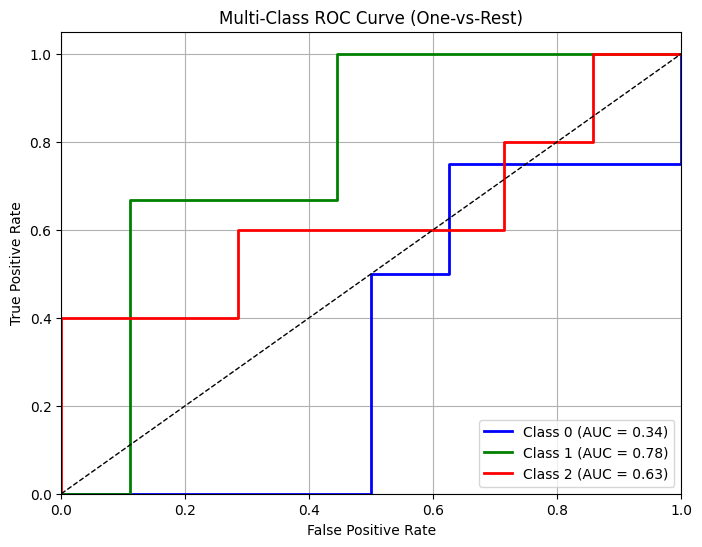

In [65]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Predict probabilities

y_test_bin = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_test_bin.shape[1]

y_score = log_reg_second.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC Curves

plt.figure(figsize = (8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color = colors[i], lw = 2,label = f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw = 1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = 'lower right')
plt.grid()
plt.show();

### Conclusion:

Class 0 is not predicted at all. Could be due to overlap in feature space or insufficient sample size. Model us underpowered for high-stakes prediction due to:
- Small dataset
- Class imbalance
- Low feature-target signal.